Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

In [2]:
df = pd.read_csv('https://data.usaid.gov/api/views/nwbq-rpfu/rows.csv?accessType=DOWNLOAD')

df.drop(['pH_KCl', 'BrayP', 'TotalP', 'RI', 'Include', 'IncludeTop', 'CEC_Ac', 'CECClay', 'ExCa_cmolc_kg', 'ExMg_cmolc_kg', 
         'ExK_cmolc_kg', 'ExNa_cmolc_kg', 'TEB', 'BS', 'BS_scaled', 'SOC_UMN', 'TN_UMN', 'WRB_Group', 'USOrder', 
         'P_DifferenceParent', 'P_RatioParent', 'P_RatioBrayTotal', 'AFSIS_BDRULE', 'Author', 'AspectCat'], 
        axis = 1, inplace = True)
df.shape

(1303, 27)

In [10]:
df['pH_H2O'].isnull().sum()

27

In [15]:
df = df[df['pH_H2O'] != np.inf]
df.shape

(1303, 27)

In [16]:
df['pH_H2O'].isnull().sum()

27

In [17]:
df['pH_H2O'].replace(np.inf, np.NaN)

0       5.3
1       4.8
2       4.6
3       4.7
4       4.4
       ... 
1298    4.2
1299    5.7
1300    6.0
1301    6.2
1302    6.3
Name: pH_H2O, Length: 1303, dtype: float64

In [18]:
df['pH_H2O'].isnull().sum()

27

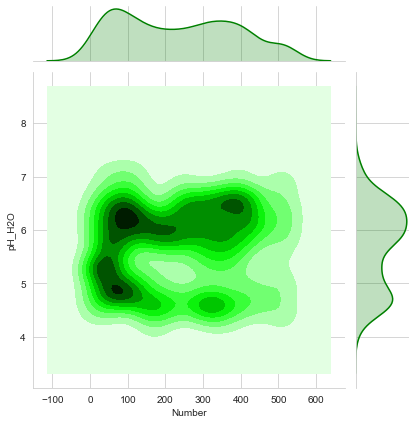

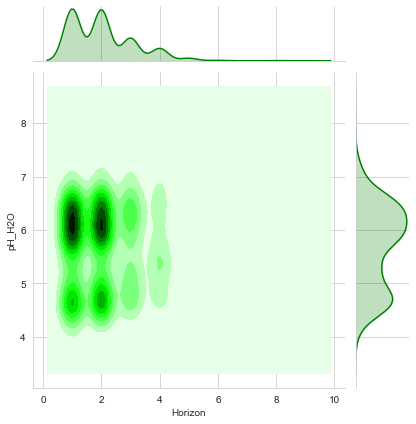

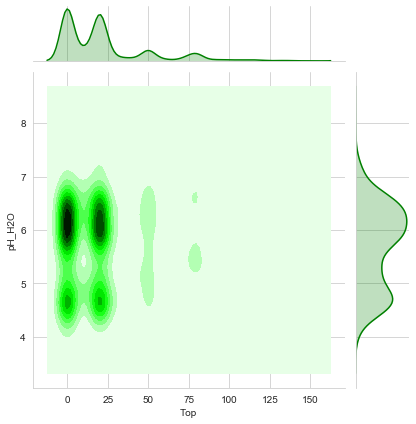

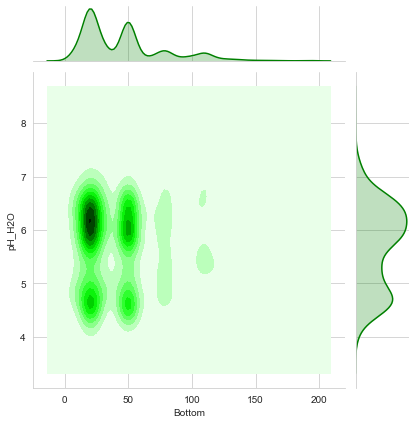

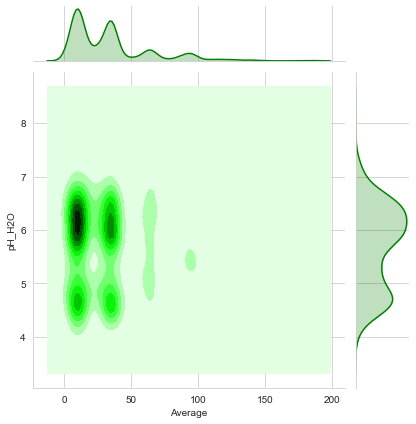

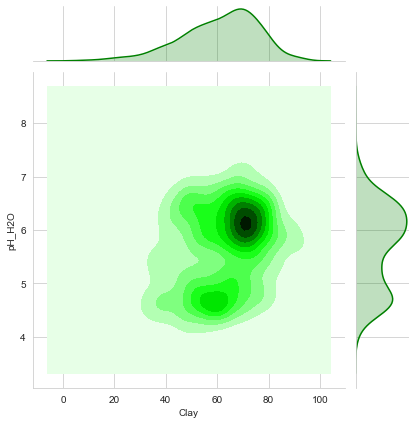

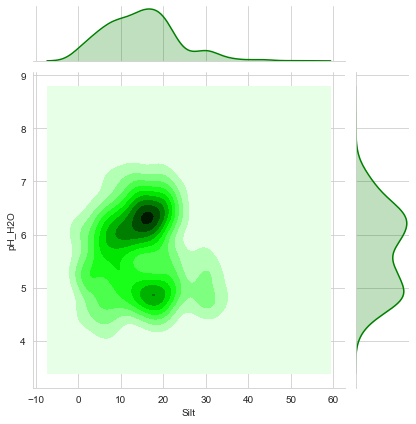

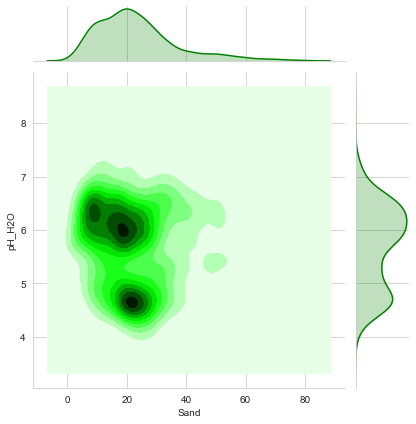

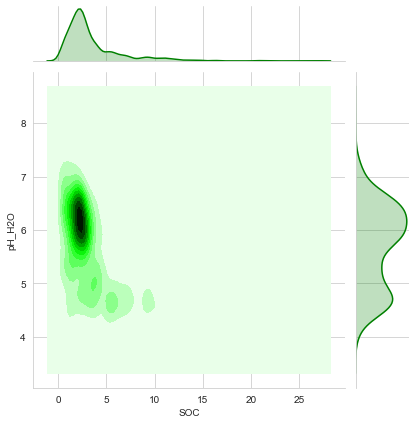

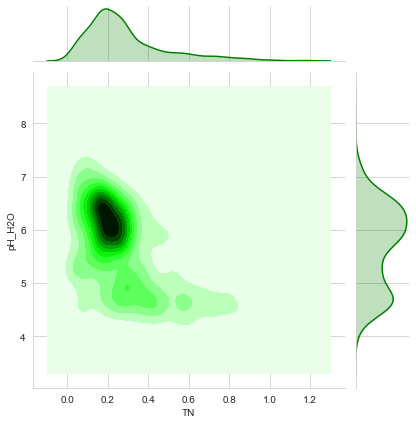

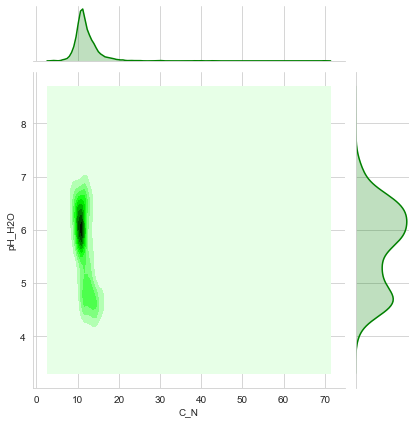

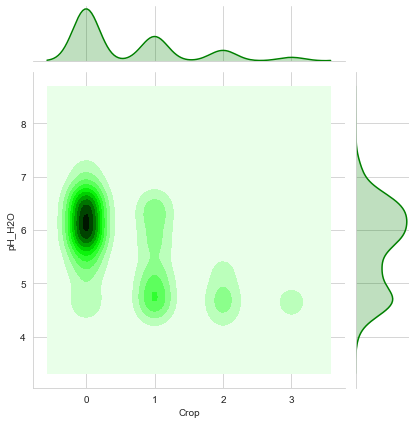

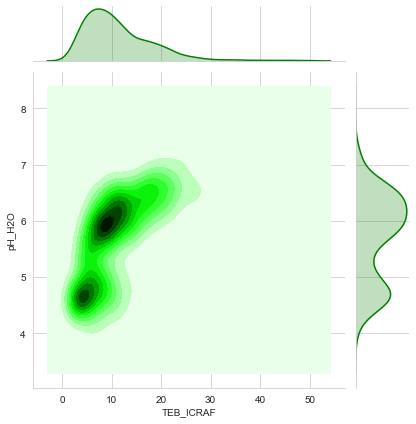

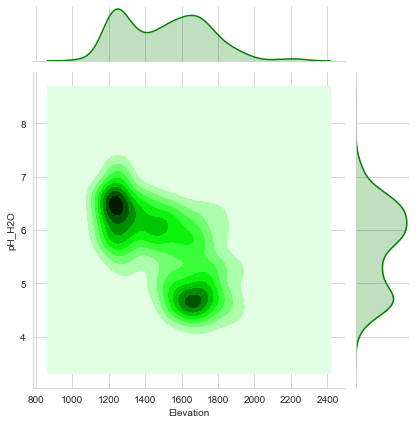

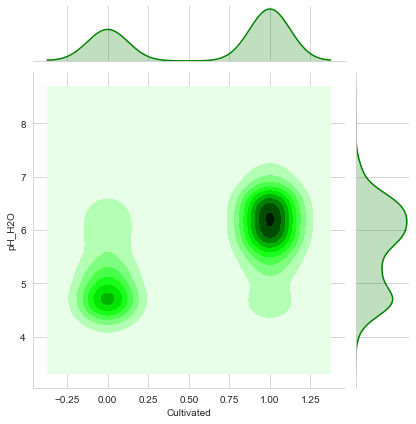

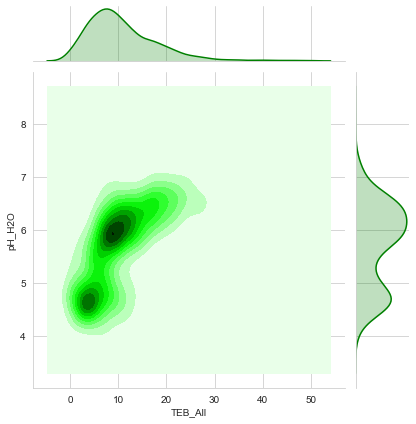

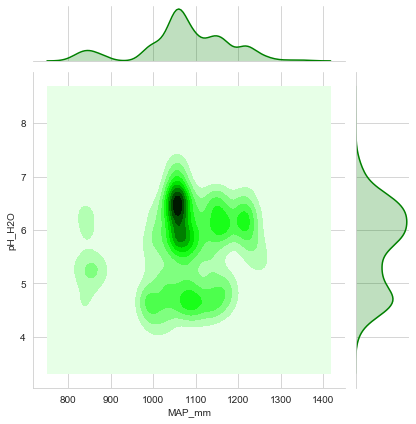

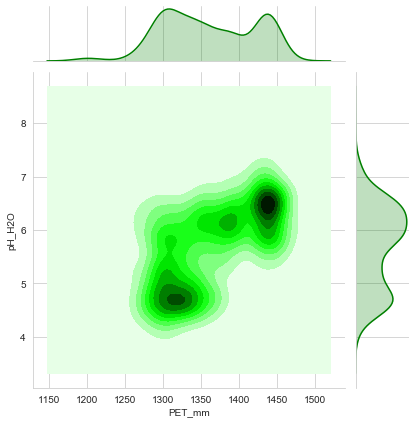

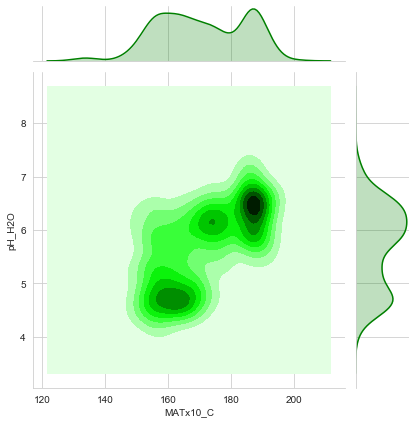

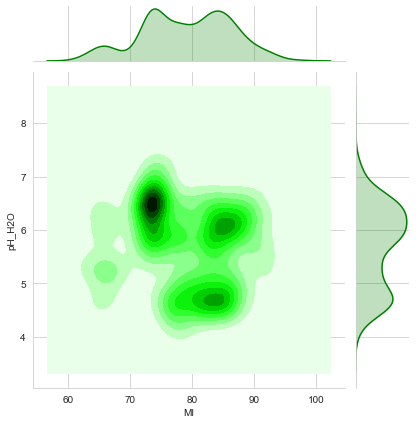

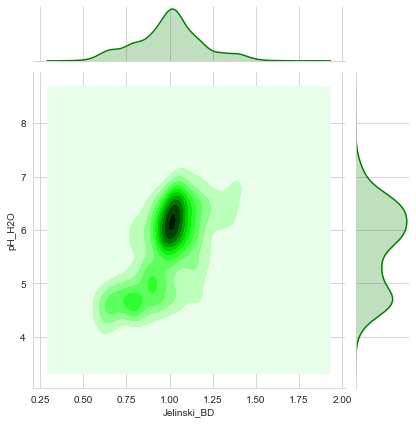

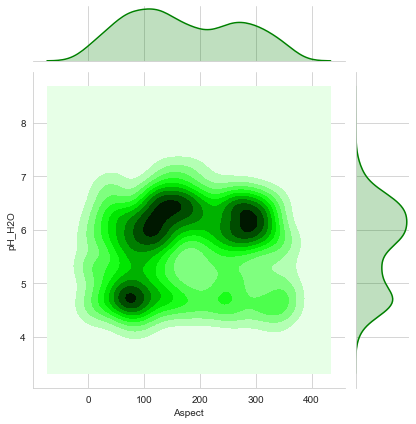

In [4]:
for column in df.drop(['Pit', 'pH_H2O'], axis = 1).describe().columns:
    sns.jointplot(data = df, x = column, y = 'pH_H2O', kind = 'kde', color = 'green')
    plt.show()

In [14]:
target = 'pH_H2O'

X = df[df.select_dtypes('number').columns].drop(target, axis = 1)
y = df[target]

In [15]:
y.isnull().sum()

27

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1042, 23), (261, 23), (1042,), (261,))

In [7]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LinearRegression()
)

pipeline.fit(X_train, y_train)
    
# imputer = SimpleImputer()
# X_train = imputer.fit_transform(X_train)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# model = LogisticRegressionCV(cv=5, n_jobs=-1)
# model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').